In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import plotly.express as px
import seaborn as sns

In [3]:
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)
damage_report

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
1,2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2,2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
3,2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
4,2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...,...
83065,2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
83066,2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
83067,2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8
83068,2020-04-09 16:55:00,8.0,8.0,9.0,NaN,7.0,0.0,8


In [4]:
damage_report['time'] = pd.to_datetime(damage_report['time'])
# damage_report.set_index('time', inplace=True)
damage_report

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
1,2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2,2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
3,2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
4,2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...,...
83065,2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
83066,2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
83067,2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8
83068,2020-04-09 16:55:00,8.0,8.0,9.0,NaN,7.0,0.0,8


In [5]:
damage_report_sorted = damage_report.sort_values(by='time')
damage_report_sorted

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
9945,2020-04-06,2.0,4.0,1.0,NaN,4.0,NaN,17
529,2020-04-06,2.0,8.0,5.0,NaN,3.0,0.0,2
4925,2020-04-06,9.0,7.0,5.0,NaN,4.0,NaN,8
2460,2020-04-06,10.0,2.0,9.0,NaN,10.0,NaN,4
8554,2020-04-06,6.0,2.0,9.0,NaN,4.0,1.0,15
...,...,...,...,...,...,...,...,...
3761,2020-04-11,7.0,7.0,8.0,10.0,10.0,NaN,6
1310,2020-04-11,5.0,2.0,2.0,NaN,8.0,NaN,2
8582,2020-04-11,5.0,1.0,3.0,NaN,2.0,NaN,15
7343,2020-04-11,4.0,9.0,7.0,NaN,7.0,NaN,13


In [15]:
damage_report_sorted_resampled = damage_report_sorted.resample('10min').mean().reset_index()
damage_report_sorted_resampled

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,2020-04-06 00:00:00,6.350000,4.700000,5.350000,7.000000,5.450000,0.333333,9.250000
1,2020-04-06 00:10:00,4.611111,5.722222,5.111111,6.142857,5.777778,0.600000,7.666667
2,2020-04-06 00:20:00,3.833333,4.083333,5.750000,5.166667,4.416667,NaN,9.583333
3,2020-04-06 00:30:00,5.700000,5.800000,4.900000,5.750000,3.900000,1.000000,7.800000
4,2020-04-06 00:40:00,6.714286,4.928571,4.357143,4.125000,4.285714,0.666667,5.571429
...,...,...,...,...,...,...,...,...
716,2020-04-10 23:20:00,4.772727,4.772727,4.590909,4.583333,6.409091,0.500000,10.636364
717,2020-04-10 23:30:00,5.555556,5.000000,3.555556,5.555556,4.888889,0.500000,8.944444
718,2020-04-10 23:40:00,6.000000,5.400000,4.800000,1.800000,5.800000,0.500000,7.900000
719,2020-04-10 23:50:00,5.692308,4.923077,5.230769,6.333333,5.076923,1.000000,9.846154


In [ ]:
# # Aggregate by time, location, and geometry, calculating the mean while ignoring NaN values
# damage_report_sorted_clean = damage_report_sorted.groupby(['time', 'location']).agg({
#     'sewer_and_water': lambda x: x.mean(skipna=True),
#     'power': lambda x: x.mean(skipna=True),
#     'roads_and_bridges': lambda x: x.mean(skipna=True),
#     'medical': lambda x: x.mean(skipna=True),
#     'buildings': lambda x: x.mean(skipna=True),
#     'shake_intensity': lambda x: x.mean(skipna=True)
# }).reset_index()

# Output the cleaned and aggregated DataFrame
damage_report_sorted_clean = damage_report_sorted
# damage_report_sorted_clean


In [ ]:
# Convert DataFrame to long format
damage_report_sorted_clean_long = pd.melt(damage_report_sorted_resampled, id_vars=['time', 'location'], 
                  value_vars=['sewer_and_water', 'power', 'roads_and_bridges', 'medical', 'buildings', 'shake_intensity'],
                  var_name='Infrastructure', value_name='Value')

# Plot the line chart
fig = px.line(damage_report_sorted_clean_long, x='time', y='Value', color='Infrastructure', title="Infrastructure Changes Over Time",
              labels={'time': 'Time', 'Value': 'Infrastructure Value'})

# Set initial x-axis range (modify this range as needed)
fig.update_xaxes(range=[damage_report_sorted_resampled['time'].min(), damage_report_sorted_resampled['time'].min() + pd.DateOffset(days=6)])  # Example zoom to first 6 months

# Enable drag-to-zoom and add a range slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

fig.show()

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

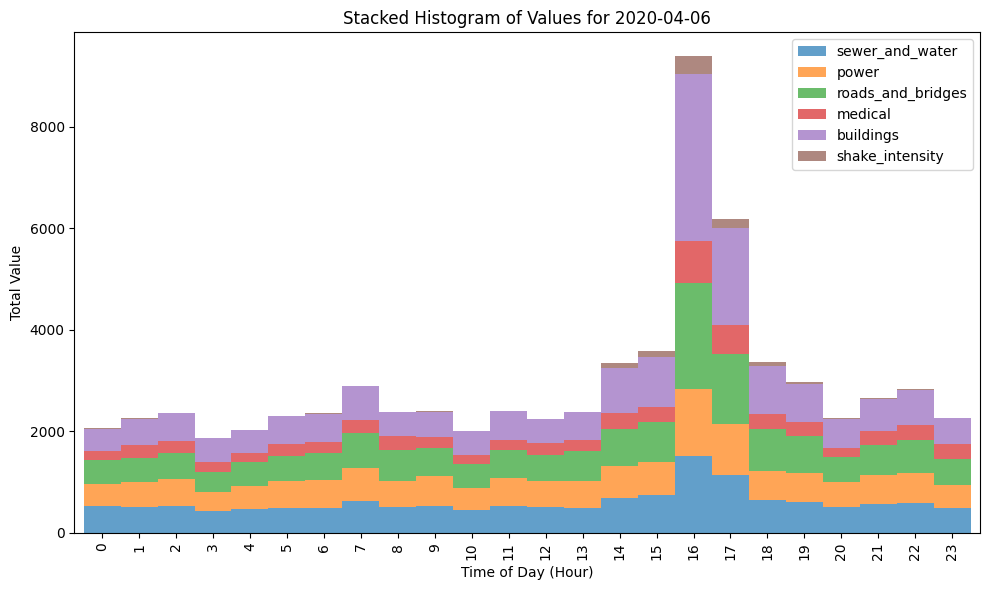

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

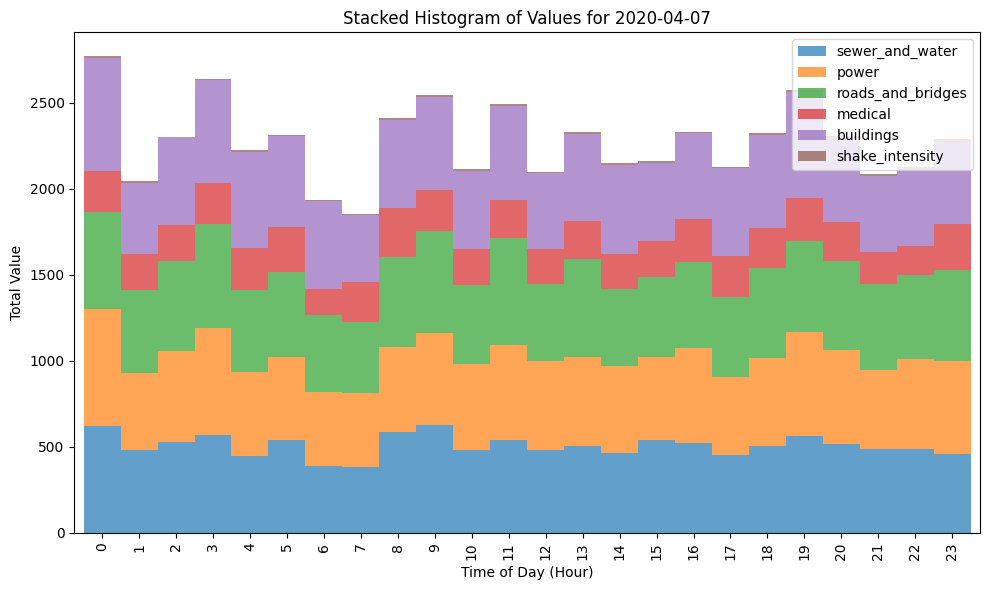

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

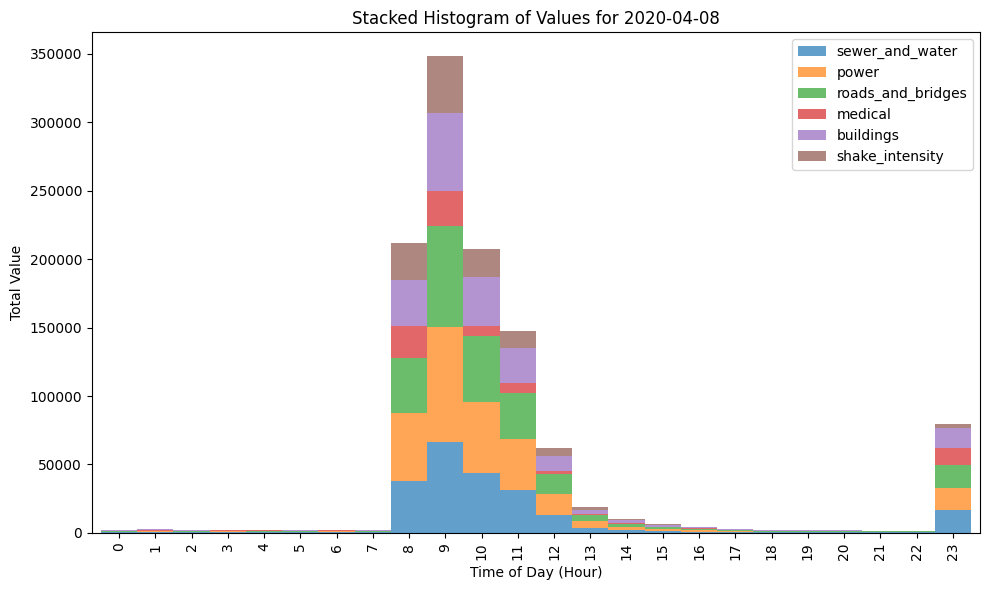

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

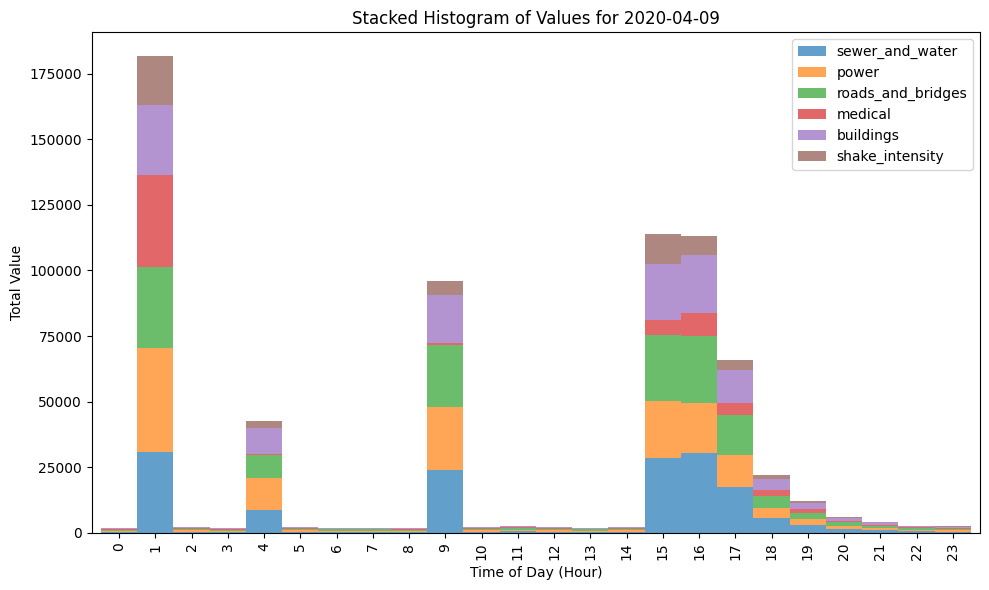

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

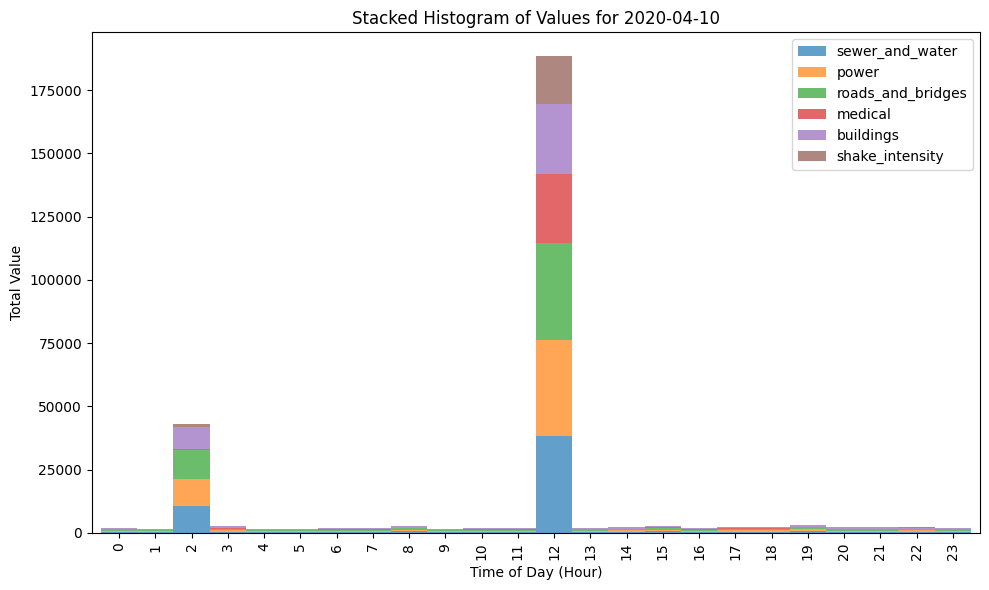

/var/folders/6_/nck3rwqj4d74qg6br8k56crm0000gn/T/ipykernel_28296/853676378.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x600 with 0 Axes>

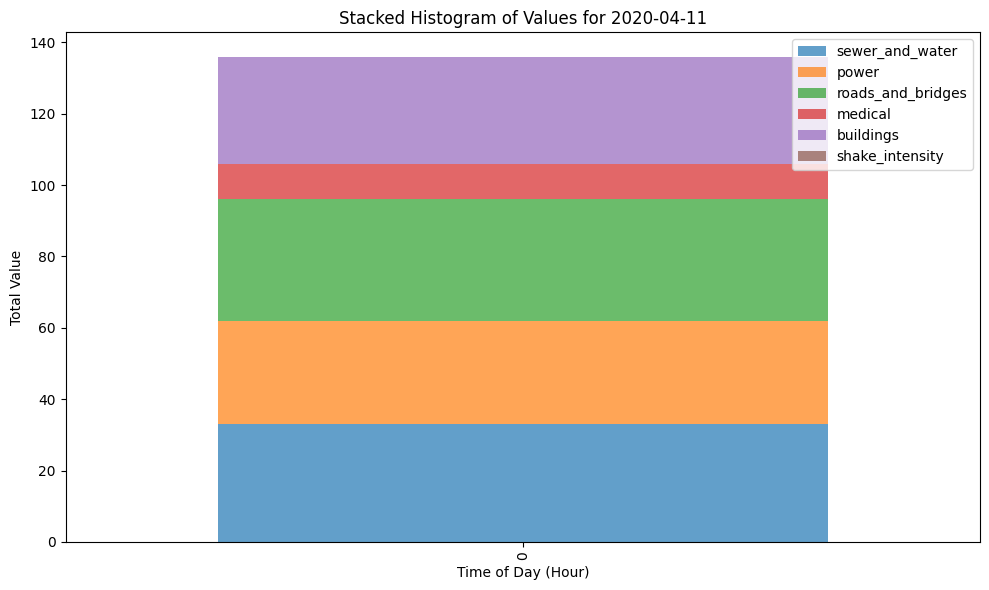

In [95]:
damage_report_sorted_clean['date'] = damage_report_sorted_clean['time'].dt.date  # Extract date from datetime

# Get unique dates in the DataFrame
unique_dates = damage_report_sorted_clean['date'].unique()

# Loop through each unique date and plot a stacked histogram for that day based on time
for date in unique_dates:
    daily_df = damage_report_sorted_clean[damage_report_sorted_clean['date'] == date]
    
    # Create time bins (e.g., hourly)
    daily_df['time_bin'] = daily_df['time'].dt.hour  # You can adjust this for different intervals (e.g., .dt.minute, .dt.day)

    # Aggregate the values by time bin (summing the values)
    time_bin_agg = daily_df.groupby('time_bin')[['sewer_and_water', 'power', 'roads_and_bridges', 
                                                 'medical', 'buildings', 'shake_intensity']].sum()

    # Plot the stacked histogram
    plt.figure(figsize=(10, 6))
    time_bin_agg.plot(kind='bar', stacked=True, width=1, alpha=0.7, figsize=(10, 6))

    # Add labels and title
    plt.xlabel('Time of Day (Hour)')
    plt.ylabel('Total Value')
    plt.title(f'Stacked Histogram of Values for {date}')
    
    # Display the plot
    plt.tight_layout()
    plt.show()


In [10]:
sth_neighborhood = gpd.read_file( "hw05-data/Sensor Data and Maps/StHimarkNeighborhoodShapefiles/StHimark.shp")
sth_neighborhood

,Id,Nbrhood,geometry
0,1,Palace Hills,"POLYGON ((-13351493.656 17391.306, -13352311.8..."
1,2,Northwest,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2,3,Old Town,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
3,4,Safe Town,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
4,5,Southwest,"POLYGON ((-13352257.891 15740.887, -13352311.8..."
5,6,Downtown,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
6,7,Wilson Forest,"POLYGON ((-13326281.927 6053.222, -13328243.84..."
7,8,Scenic Vista,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
8,9,Broadview,"POLYGON ((-13336454.829 1419.691, -13336684.69..."
9,10,Chapparal,"POLYGON ((-13335203.444 7716.247, -13335278.73..."


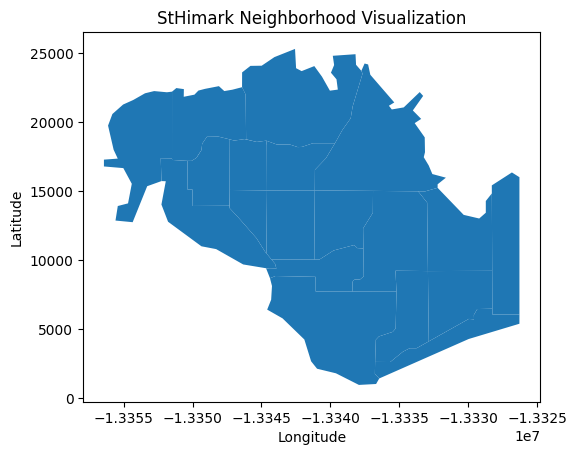

In [11]:
sth_neighborhood.plot()
plt.title("StHimark Neighborhood Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [12]:
# damage_report_indexed = damage_report_clean.reset_index()
# damage_report_indexed

In [24]:
sth_neighborhood = sth_neighborhood.rename(columns={"Id": "location"})
damage_report_wiz_neighborhoods = damage_report_clean_sorted.merge(sth_neighborhood[['location', 'geometry']], how='left')
damage_report_wiz_neighborhoods

,time,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,geometry
0,2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
1,2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
2,2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
3,2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
4,2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...,...
10284,2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
10285,2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
10286,2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN,"POLYGON ((-13333633.544 14998.643, -13332978.0..."
10287,2020-04-11,15,5.0,1.0,3.0,NaN,2.0,NaN,"POLYGON ((-13344655.638 18673.309, -13344617.0..."


In [25]:
damage_report_wiz_neighborhoods.set_index('time')

,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,geometry
time,,,,,,,,
2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...
2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN,"POLYGON ((-13333633.544 14998.643, -13332978.0..."


In [26]:
damage_report_wiz_neighborhoods['geometry'] = damage_report_wiz_neighborhoods['geometry'].apply(lambda geom: geom.wkt)

In [27]:
damage_report_wiz_neighborhoods['time'] = pd.to_datetime(damage_report_wiz_neighborhoods['time'])
damage_report_wiz_neighborhoods.set_index('time', inplace=True)

In [17]:
# damage_report_indexed = damage_report_clean.reset_index()
# damage_report_indexed

In [ ]:
# fig = px.choropleth(damage_report_wiz_neighborhoods,
#                     geojson=damage_report_wiz_neighborhoods.geometry,
#                     locations=damage_report_wiz_neighborhoods.index,
#                     color="sewer_and_water",  # or any other attribute
#                     animation_frame=damage_report_wiz_neighborhoods.index.strftime('%Y-%m-%d %H:%M:%S'),
#                     title="Infrastructure Status Over Time by Neighborhood")

# # Update map view
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# SAMPLE DATA TEST

In [13]:
# Sample 10 observations from the cleaned data
sample_data = damage_report_wiz_neighborhoods.sample(n=10, random_state=1)

In [18]:

# Assuming 'sth_neighborhood' is your base map (GeoDataFrame)
# and 'sample_data' contains the columns including 'time', 'geometry', and 'sewer_and_water' for visualization

# Convert 'time' in sample_data to datetime and ensure it's sorted
sample_data = sample_data.reset_index()  # Reset index if 'time' is in the index
sample_data['time'] = pd.to_datetime(sample_data['time'])
sample_data = sample_data.sort_values(by='time')

# Plot heat map with Plotly using 'sewer_and_water' as the intensity value and animate by 'time'
fig = px.choropleth(
    sample_data,
    geojson=sth_neighborhood.__geo_interface__,  # Convert sth_neighborhood to GeoJSON format
    locations=sample_data.index,
    color="sewer_and_water",  # Adjust this to any attribute you want to visualize as heat intensity
    animation_frame=sample_data['time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
    title="Infrastructure Status Over Time by Neighborhood",
    hover_name="location",  # Optional: show location on hover
)

# Customize map appearance
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    coloraxis_colorbar=dict(title="Sewer and Water Damage Intensity"),
    sliders=[dict(currentvalue={"prefix": "Date: "})]
)

# Show the interactive map with time slider
fig.show()
